## 8.2. test simulations

This notebook applies our pseudotime method on a simulation dataset. Note: the R code in script 3.1. has been converted to Python script for this purpose.

In [26]:
### load libraries

# standard libraries
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
np.random.seed(1)

# plotting libraries 
from matplotlib import pyplot as plt
plt.rcParams['pdf.fonttype'] = 42 #for saving PDF with changeable text
plt.rcParams['ps.fonttype'] = 42 #for saving PDF with changeable text
import matplotlib.cm as cm #for generating colors

Function `response_pseudotime` is the same as the original function in script 3.1. 

In [27]:
### create function of regression model without intercept
def response_pseudotime(X,Tvect):
    """
    Calculate pseudotime using a regression model without an intercept.

    Parameters:
    - X: numpy array, count matrix (cells x genes)
    - Tvect: numpy array, vector of experimental timepoints for each cell

    Returns:
    - PT: numpy array, pseudotime values
    """
    
    # get covariance matrix
    XXt = np.dot(X, X.T)

    # find the inverse of XXt
    XXtinv = np.linalg.inv(XXt)

    # find the transformation (W) in gene space
    W = np.dot(np.dot(XXtinv, X), Tvect)

    # derive pseudotime (PT) from transformation
    PT = np.dot(W.T, X)
    
    # order cells according to pseudotime
    ordered_indices = np.argsort(PT)
    PT_order = np.argsort(ordered_indices) + 1
    
    return(PT_order)

Here, we calculate pseudotime for different types of simulations to see how well we are able to recover the pseudotemporal order and the temporal dynamics of individual genes. We include the following simulations:

**Simulation 1:** 10 monotonic genes, 10 complex genes, 1000 cells sampled randomly from continuous time.

In [28]:
### import simulations
data_path = "../results/simulations/"
X_sim1 = pd.read_csv(data_path + "X_continuous_time.csv", sep=",").T #transposed to have genes in rows & cells in columns
T_sim1 = pd.read_csv(data_path + "t_continuous_time.csv", sep=",").values

In [29]:
T_assigned_sim1 = T_sim1[:,0]

In [30]:
### calculate pseudotemporal order
PT_order_sim1 = response_pseudotime(X_sim1, T_assigned_sim1)

In [31]:
### calculate true order
true_order_sim1 = T_assigned_sim1 + 1

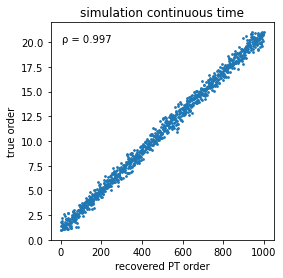

In [32]:
### plot true order versus recovered order
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(PT_order_sim1, true_order_sim1, s=3)
ax.set(xlabel='recovered PT order', ylabel='true order')

# calculate correlation between recovered and true
spearman_corr, _ = spearmanr(PT_order_sim1, true_order_sim1)
ax.text(5, 20, f'ρ = {spearman_corr:.3f}')

# add title
ax.title.set_text("simulation continuous time")

# save figure
save_path = "../figures/8.2.sim1_real_vs_recovered_order.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)

plt.show()

**Simulation 2:** 10 monotonic genes, 10 complex genes, 1000 cells sampled from a Gaussian at 4 different timepoints to mimic sampling at one experimental timepoint.

In [33]:
### import simulations
data_path = "../results/simulations/"
X_sim2 = pd.read_csv(data_path + "X_discrete_time.csv", sep=",", header=None).T #transposed to have genes in rows & cells in columns
T_sim2 = pd.read_csv(data_path + "t_discrete_time.csv", sep=",", header=None).values
T_assigned_sim2 = T_sim2[:,0]
T_true_sim2 = T_sim2[:,1]

In [34]:
### convert assigned time (T_assigned_sim2) to 0,1,2,3

# define bins and corresponding values
bins = [0., 5., 10., 20.]

# use np.digitize to convert values
T_assigned_sim2 = np.digitize(T_assigned_sim2, bins, right=True)

In [35]:
### calculate pseudotemporal order
PT_order_sim2 = response_pseudotime(X_sim2, T_assigned_sim2)

In [36]:
### calculate true order
true_order_sim2 = np.argsort(np.argsort(T_true_sim2.flatten())) + 1

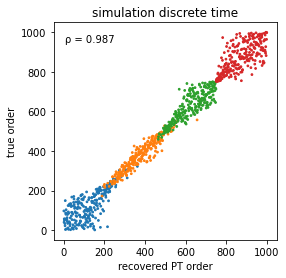

In [37]:
### plot true order versus recovered order
fig, ax = plt.subplots(1,1,figsize=(4,4))
colors = cm.tab10(T_assigned_sim2)
ax.scatter(PT_order_sim2, true_order_sim2, s=3, c=colors)
ax.set(xlabel='recovered PT order', ylabel='true order')

# calculate correlation between recovered and true
spearman_corr, _ = spearmanr(PT_order_sim2, true_order_sim2)
ax.text(5, 950, f'ρ = {spearman_corr:.3f}')

# add title
ax.title.set_text("simulation discrete time")

# save figure
save_path = "../figures/8.2.sim2_real_vs_recovered_order.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)

plt.show()

**Simulation 3:** 20 complex genes, 1000 cells sampled from a Gaussian at 4 different timepoints to mimic sampling at one experimental timepoint.

In [38]:
### import simulations
data_path = "../results/simulations/"
X_sim3 = pd.read_csv(data_path + "X_non_monotonic.csv", sep=",", header=None).T #transposed to have genes in rows & cells in columns
T_sim3 = pd.read_csv(data_path + "t_non_monotonic.csv", sep=",", header=None).values
T_assigned_sim3 = T_sim3[:,0]
T_true_sim3 = T_sim3[:,1]

In [39]:
### convert assigned time (T_assigned_sim3) to 0,1,2,3

# define bins and corresponding values
bins = [0., 5., 10., 20.]

# use np.digitize to convert values
T_assigned_sim3 = np.digitize(T_assigned_sim3, bins, right=True)

In [40]:
### calculate pseudotemporal order
PT_order_sim3 = response_pseudotime(X_sim3, T_assigned_sim3)

In [41]:
### calculate true order
true_order_sim3 = np.argsort(np.argsort(T_true_sim3.flatten())) + 1

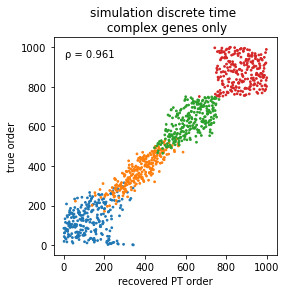

In [42]:
### plot true order versus recovered order
fig, ax = plt.subplots(1,1,figsize=(4,4))
colors = cm.tab10(T_assigned_sim3)
ax.scatter(PT_order_sim3, true_order_sim3, s=3, c=colors)
ax.set(xlabel='recovered PT order', ylabel='true order')

# calculate correlation between recovered and true
spearman_corr, _ = spearmanr(PT_order_sim3, true_order_sim3)
ax.text(5, 950, f'ρ = {spearman_corr:.3f}')

# add title
ax.title.set_text("simulation discrete time \n complex genes only")

# save figure
save_path = "../figures/8.2.sim3_real_vs_recovered_order.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)

plt.show()

### Plotting genes in recovered pseudotime

Here, we plot the dynamcis of all 20 genes in the recovered pseudotime.

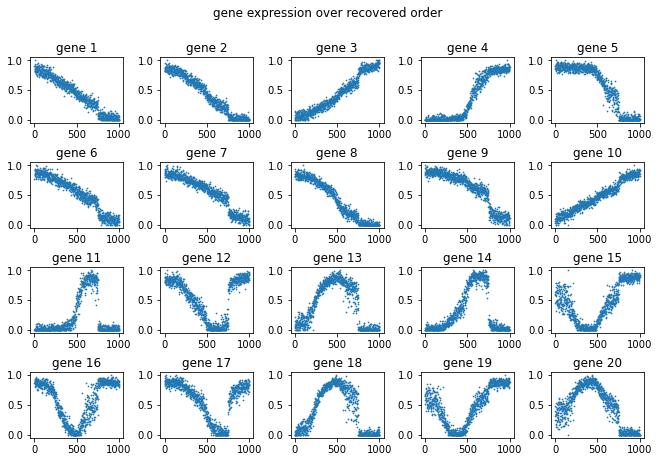

In [43]:
### plot genes in recovered PT
fig, ax = plt.subplots(4,5,figsize=(11,7), gridspec_kw={'wspace':0.4, 'hspace':0.6})

ax = ax.ravel()

for idx in X_sim2.index.values:
    ax[idx].scatter(PT_order_sim2, X_sim2.iloc[idx,], s=0.5)
    ax[idx].title.set_text(f"gene {idx+1}")
    
fig.suptitle('gene expression over recovered order')

# save figure
save_path = "../figures/8.2.all_genes_PT_order.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)

plt.show()

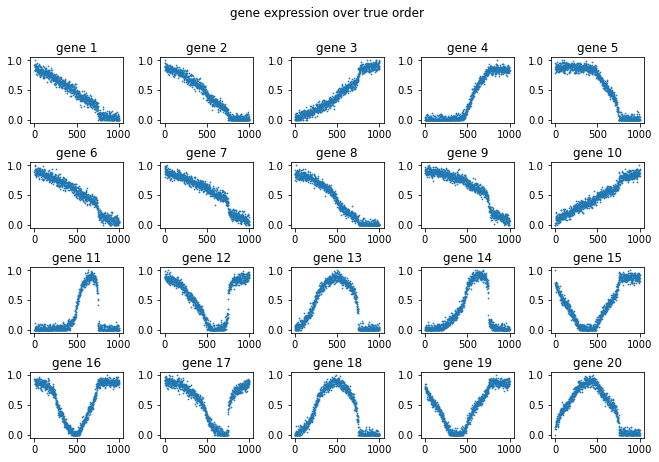

In [44]:
### plot genes using true order
fig, ax = plt.subplots(4,5,figsize=(11,7), gridspec_kw={'wspace':0.4, 'hspace':0.6})

ax = ax.ravel()

for idx in X_sim2.index.values:
    ax[idx].scatter(true_order_sim2, X_sim2.iloc[idx,], s=0.5)
    ax[idx].title.set_text(f"gene {idx+1}")

fig.suptitle('gene expression over true order')
    
# save figure
save_path = "../figures/8.2.all_genes_true_order.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)

plt.show()

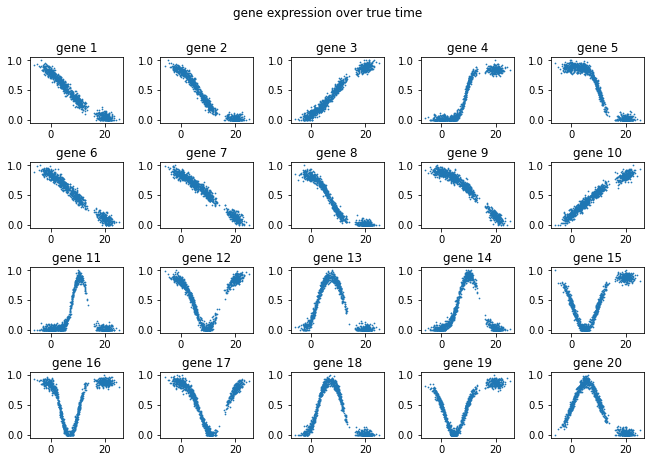

In [45]:
### plot genes usign true time
fig, ax = plt.subplots(4,5,figsize=(11,7), gridspec_kw={'wspace':0.4, 'hspace':0.6})

ax = ax.ravel()

for idx in X_sim2.index.values:
    ax[idx].scatter(T_true_sim2, X_sim2.iloc[idx,], s=0.5)
    ax[idx].title.set_text(f"gene {idx+1}")
    
fig.suptitle('gene expression over true time')

# save figure
save_path = "../figures/8.2.all_genes_true time.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)

plt.show()

### Adding intercept to the regression model

Here, we compare our original regression model with a model with intercept included. 

In [46]:
### create function of regression model with intercept
def calculate_pseudotime_intercept(X, Tvect):
    """
    Calculate pseudotime using a regression model with an intercept.

    Parameters:
    - X: numpy array, count matrix (cells x genes)
    - Tvect: numpy array, vector of experimental timepoints for each cell

    Returns:
    - PT: numpy array, pseudotime values
    """

    # add a column of ones for the intercept
    X_with_intercept = np.row_stack((np.ones(X.shape[1]), X))

    # get covariance matrix
    XXt = np.dot(X_with_intercept, X_with_intercept.T)

    # find the inverse of XXt
    XXtinv = np.linalg.inv(XXt)

    # find the transformation (W) in genes space
    W = np.dot(np.dot(XXtinv, X_with_intercept), Tvect)

    # derive pseudotime (PT) from transformation
    PT = np.dot(W.T, X_with_intercept)
    
    # order cells according to pseudotime
    ordered_indices = np.argsort(PT)
    PT_order = np.argsort(ordered_indices) + 1

    return PT_order

In [47]:
### import simulations
data_path = "../results/simulations/"
X_sim2 = pd.read_csv(data_path + "X_discrete_time.csv", sep=",", header=None).T #transposed to have genes in rows & cells in columns
T_sim2 = pd.read_csv(data_path + "t_discrete_time.csv", sep=",", header=None).values
T_assigned_sim2 = T_sim2[:,0]
T_true_sim2 = T_sim2[:,1]

In [48]:
### convert assigned time (T_assigned_sim2) to 0,1,2,3

# define bins and corresponding values
bins = [0., 5., 10., 20.]

# use np.digitize to convert values
T_assigned_sim2 = np.digitize(T_assigned_sim2, bins, right=True)

In [49]:
### calculate pseudotemporal order
PT_order_sim2_intercept = calculate_pseudotime_intercept(X_sim2, T_assigned_sim2)

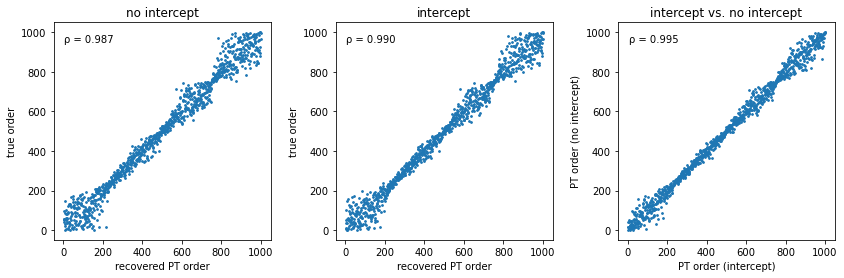

In [50]:
### plot true order versus recovered order
fig, ax = plt.subplots(1,3,figsize=(14,4), gridspec_kw={'wspace':0.3})

ax[0].scatter(PT_order_sim2, true_order_sim2, s=3)
ax[0].set(xlabel='recovered PT order', ylabel='true order')
spearman_corr, _ = spearmanr(PT_order_sim2, true_order_sim2) #calculate corr.
ax[0].text(5, 950, f'ρ = {spearman_corr:.3f}')
ax[0].title.set_text("no intercept") #add title

ax[1].scatter(PT_order_sim2_intercept, true_order_sim2, s=3)
ax[1].set(xlabel='recovered PT order', ylabel='true order')
spearman_corr, _ = spearmanr(PT_order_sim2_intercept, true_order_sim2) #calculate corr.
ax[1].text(5, 950, f'ρ = {spearman_corr:.3f}')
ax[1].title.set_text("intercept") #add title

ax[2].scatter(PT_order_sim2, PT_order_sim2_intercept, s=3)
ax[2].set(xlabel='PT order (intercept)', ylabel='PT order (no intercept)')
spearman_corr, _ = spearmanr(PT_order_sim2_intercept, PT_order_sim2) #calculate corr.
ax[2].text(5, 950, f'ρ = {spearman_corr:.3f}')
ax[2].title.set_text("intercept vs. no intercept") #add title

# save figure
save_path = "../figures/8.2.sim2_intercept_vs_no_intercept.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)

plt.show()